In [58]:
from config import *
import torch 
from unet import UNet
import tifffile
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [59]:
model = UNet(3,3)
model.load_state_dict(torch.load('weights'))
model.cuda()

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [71]:
image = tifffile.imread('image_test.tif')/255
tensor = ToTensor()(image)[None].cuda().to(torch.float32)
### Post processing: apply exponential
segmentation = torch.exp(model(tensor))[0].cpu().detach().numpy()
segmented_image = np.transpose(segmentation , (1,2,0))


Text(0.5, 1.0, 'Segmentation result')

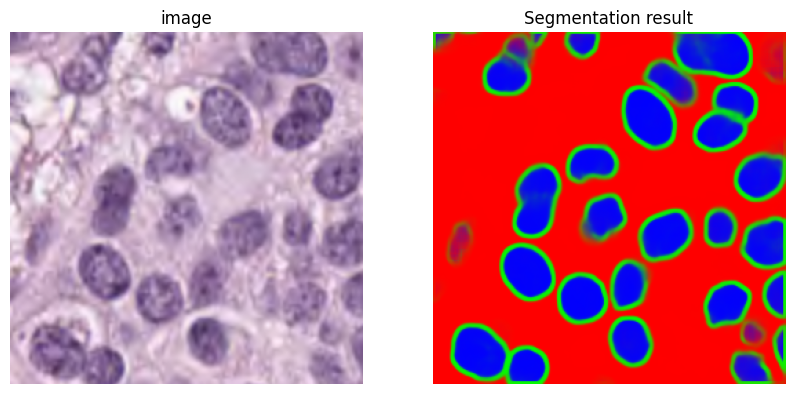

In [72]:

from matplotlib import pyplot as plt 
  
# create figure 
fig = plt.figure(figsize=(10, 7)) 
  
# setting values to rows and column variables 
rows = 1
columns = 2
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(image) 
plt.axis('off') 
plt.title("image") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(segmented_image) 
plt.axis('off') 
plt.title("Segmentation result") 